In [1]:
import pandas as pd 
import numpy as np  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# read train data
data_train = pd.read_csv("../dataset/UGR/balanced_data_dos.csv")

# Create matrix of features and matrix of target variable 
dataset = data_train.values
X = dataset[:,0:19]
y = dataset[:,19]

# convert the scaled array to dataframe 
#min_max_scaler = MinMaxScaler()
#X_scale = min_max_scaler.fit_transform(X)

X_train = X
y_train = y

# read test data
data_test = pd.read_csv("../dataset/UGR/testdos.csv") 
dataset1 = data_test.values
X1 = dataset1[:,0:19]
y1 = dataset1[:,19]

# convert the scaled array to dataframe 
#scaler = MinMaxScaler()
#X_scale_test = scaler.fit_transform(X1)

X_test = X1
y_test = y1

print(data_train['Label'].value_counts())
print(data_test['Label'].value_counts())

0.0    14029
1.0    14029
Name: Label, dtype: int64
0    5971
1    1335
Name: Label, dtype: int64


In [2]:
# define the keras model
model = Sequential()
model.add(Dense(128, input_shape=(19,), activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=1000, batch_size=30)

# make class predictions with the model
y_pred = predictions = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

%matplotlib inline
# Testing 
cm = confusion_matrix(y_test, y_pred) 
tnr = recall_score(y_test, y_pred) 
fpr = 1 - tnr

print ("confusion_matrix for test data\n",cm)
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred))
print('FPR Score: %.4f' % fpr)

2022-09-17 23:09:08.638573: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-17 23:09:08.638742: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mltest-virtual-machine): /proc/driver/nvidia/version does not exist
2022-09-17 23:09:08.641176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
936/936 [==============================] - 5s 4ms/step - loss: 0.0505 - accuracy: 0.9880
Epoch 2/1000
936/936 [==============================] - 3s 3ms/step - loss: 0.0054 - accuracy: 0.9984
Epoch 3/1000
936/936 [==============================] - 3s 4ms/step - loss: 0.0044 - accuracy: 0.9987
Epoch 4/1000
936/936 [==============================] - 4s 4ms/step - loss: 0.0037 - accuracy: 0.9988
Epoch 5/1000
936/936 [==============================] - 4s 4ms/step - loss: 0.0036 - accuracy: 0.9988
Epoch 6/1000
936/936 [==============================] - 4s 4ms/step - loss: 0.0035 - accuracy: 0.9990
Epoch 7/1000
936/936 [==============================] - 3s 4ms/step - loss: 0.0035 - accuracy: 0.9989
Epoch 8/1000
936/936 [==============================] - 4s 4ms/step - loss: 0.0028 - accuracy: 0.9992
Epoch 9/1000
936/936 [==============================] - 4s 4ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 10/1000
936/936 [==============================] - 4s 4ms/step - loss: 0.003

936/936 [==============================] - 4s 4ms/step - loss: 6.5289e-04 - accuracy: 0.9998
Epoch 80/1000
936/936 [==============================] - 4s 4ms/step - loss: 8.5523e-04 - accuracy: 0.9997
Epoch 81/1000
936/936 [==============================] - 4s 4ms/step - loss: 4.7001e-04 - accuracy: 0.9999
Epoch 82/1000
936/936 [==============================] - 3s 3ms/step - loss: 3.1862e-04 - accuracy: 0.9999
Epoch 83/1000
936/936 [==============================] - 3s 3ms/step - loss: 9.5569e-04 - accuracy: 0.9997
Epoch 84/1000
936/936 [==============================] - 4s 4ms/step - loss: 6.3128e-04 - accuracy: 0.9998
Epoch 85/1000
936/936 [==============================] - 3s 4ms/step - loss: 5.3793e-04 - accuracy: 0.9998
Epoch 86/1000
936/936 [==============================] - 3s 4ms/step - loss: 3.8408e-04 - accuracy: 0.9999
Epoch 87/1000
936/936 [==============================] - 3s 3ms/step - loss: 7.0710e-04 - accuracy: 0.9998
Epoch 88/1000
936/936 [============================

936/936 [==============================] - 3s 3ms/step - loss: 5.9282e-05 - accuracy: 1.0000
Epoch 156/1000
936/936 [==============================] - 2s 2ms/step - loss: 3.7929e-05 - accuracy: 1.0000
Epoch 157/1000
936/936 [==============================] - 2s 2ms/step - loss: 3.3594e-05 - accuracy: 1.0000
Epoch 158/1000
936/936 [==============================] - 2s 3ms/step - loss: 9.9143e-04 - accuracy: 0.9997
Epoch 159/1000
936/936 [==============================] - 3s 3ms/step - loss: 1.7344e-04 - accuracy: 0.9999
Epoch 160/1000
936/936 [==============================] - 2s 2ms/step - loss: 6.4415e-05 - accuracy: 1.0000
Epoch 161/1000
936/936 [==============================] - 3s 3ms/step - loss: 2.5879e-05 - accuracy: 1.0000
Epoch 162/1000
936/936 [==============================] - 3s 3ms/step - loss: 2.6036e-05 - accuracy: 1.0000
Epoch 163/1000
936/936 [==============================] - 3s 3ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 164/1000
936/936 [=======================

936/936 [==============================] - 2s 3ms/step - loss: 1.3681e-05 - accuracy: 1.0000
Epoch 232/1000
936/936 [==============================] - 3s 3ms/step - loss: 1.1585e-05 - accuracy: 1.0000
Epoch 233/1000
936/936 [==============================] - 2s 3ms/step - loss: 1.6055e-05 - accuracy: 1.0000
Epoch 234/1000
936/936 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 235/1000
936/936 [==============================] - 2s 3ms/step - loss: 2.0670e-05 - accuracy: 1.0000
Epoch 236/1000
936/936 [==============================] - 2s 3ms/step - loss: 1.4857e-05 - accuracy: 1.0000
Epoch 237/1000
936/936 [==============================] - 3s 3ms/step - loss: 1.3183e-05 - accuracy: 1.0000
Epoch 238/1000
936/936 [==============================] - 2s 3ms/step - loss: 1.2272e-05 - accuracy: 1.0000
Epoch 239/1000
936/936 [==============================] - 2s 2ms/step - loss: 1.1657e-05 - accuracy: 1.0000
Epoch 240/1000
936/936 [=======================

936/936 [==============================] - 2s 2ms/step - loss: 1.9369e-05 - accuracy: 1.0000
Epoch 308/1000
936/936 [==============================] - 2s 2ms/step - loss: 1.0267e-05 - accuracy: 1.0000
Epoch 309/1000
936/936 [==============================] - 2s 2ms/step - loss: 7.2896e-06 - accuracy: 1.0000
Epoch 310/1000
936/936 [==============================] - 2s 2ms/step - loss: 6.4610e-06 - accuracy: 1.0000
Epoch 311/1000
936/936 [==============================] - 2s 3ms/step - loss: 6.1024e-06 - accuracy: 1.0000
Epoch 312/1000
936/936 [==============================] - 2s 2ms/step - loss: 5.8541e-06 - accuracy: 1.0000
Epoch 313/1000
936/936 [==============================] - 2s 2ms/step - loss: 5.4963e-06 - accuracy: 1.0000
Epoch 314/1000
936/936 [==============================] - 2s 2ms/step - loss: 5.3206e-06 - accuracy: 1.0000
Epoch 315/1000
936/936 [==============================] - 2s 2ms/step - loss: 8.6477e-04 - accuracy: 0.9998
Epoch 316/1000
936/936 [===================

936/936 [==============================] - 2s 2ms/step - loss: 2.8540e-06 - accuracy: 1.0000
Epoch 384/1000
936/936 [==============================] - 2s 2ms/step - loss: 2.7537e-06 - accuracy: 1.0000
Epoch 385/1000
936/936 [==============================] - 2s 2ms/step - loss: 3.0239e-06 - accuracy: 1.0000
Epoch 386/1000
936/936 [==============================] - 2s 3ms/step - loss: 5.3306e-06 - accuracy: 1.0000
Epoch 387/1000
936/936 [==============================] - 2s 2ms/step - loss: 8.1529e-04 - accuracy: 0.9999
Epoch 388/1000
936/936 [==============================] - 2s 2ms/step - loss: 3.5240e-05 - accuracy: 1.0000
Epoch 389/1000
936/936 [==============================] - 2s 2ms/step - loss: 4.6973e-06 - accuracy: 1.0000
Epoch 390/1000
936/936 [==============================] - 2s 3ms/step - loss: 3.1873e-06 - accuracy: 1.0000
Epoch 391/1000
936/936 [==============================] - 2s 3ms/step - loss: 2.9924e-06 - accuracy: 1.0000
Epoch 392/1000
936/936 [===================

936/936 [==============================] - 2s 2ms/step - loss: 1.6236e-06 - accuracy: 1.0000
Epoch 460/1000
936/936 [==============================] - 3s 3ms/step - loss: 1.4155e-06 - accuracy: 1.0000
Epoch 461/1000
936/936 [==============================] - 4s 4ms/step - loss: 1.3698e-06 - accuracy: 1.0000
Epoch 462/1000
936/936 [==============================] - 5s 6ms/step - loss: 4.2432e-04 - accuracy: 0.9999
Epoch 463/1000
936/936 [==============================] - 3s 3ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 464/1000
936/936 [==============================] - 2s 3ms/step - loss: 1.0694e-05 - accuracy: 1.0000
Epoch 465/1000
936/936 [==============================] - 3s 3ms/step - loss: 3.4490e-06 - accuracy: 1.0000
Epoch 466/1000
936/936 [==============================] - 3s 3ms/step - loss: 2.4136e-06 - accuracy: 1.0000
Epoch 467/1000
936/936 [==============================] - 2s 2ms/step - loss: 1.9778e-06 - accuracy: 1.0000
Epoch 468/1000
936/936 [=======================

936/936 [==============================] - 2s 2ms/step - loss: 1.9802e-04 - accuracy: 0.9999
Epoch 536/1000
936/936 [==============================] - 2s 2ms/step - loss: 9.4390e-04 - accuracy: 0.9999
Epoch 537/1000
936/936 [==============================] - 2s 2ms/step - loss: 1.2972e-06 - accuracy: 1.0000
Epoch 538/1000
936/936 [==============================] - 2s 2ms/step - loss: 8.4672e-07 - accuracy: 1.0000
Epoch 539/1000
936/936 [==============================] - 2s 2ms/step - loss: 7.9065e-07 - accuracy: 1.0000
Epoch 540/1000
936/936 [==============================] - 2s 2ms/step - loss: 7.6301e-07 - accuracy: 1.0000
Epoch 541/1000
936/936 [==============================] - 2s 2ms/step - loss: 7.5609e-07 - accuracy: 1.0000
Epoch 542/1000
936/936 [==============================] - 2s 2ms/step - loss: 7.4047e-07 - accuracy: 1.0000
Epoch 543/1000
936/936 [==============================] - 2s 2ms/step - loss: 7.2249e-07 - accuracy: 1.0000
Epoch 544/1000
936/936 [===================

936/936 [==============================] - 3s 3ms/step - loss: 4.2765e-07 - accuracy: 1.0000
Epoch 612/1000
936/936 [==============================] - 3s 3ms/step - loss: 4.8629e-07 - accuracy: 1.0000
Epoch 613/1000
936/936 [==============================] - 2s 3ms/step - loss: 3.2595e-05 - accuracy: 1.0000
Epoch 614/1000
936/936 [==============================] - 3s 3ms/step - loss: 0.0022 - accuracy: 0.9998
Epoch 615/1000
936/936 [==============================] - 2s 3ms/step - loss: 2.3734e-06 - accuracy: 1.0000
Epoch 616/1000
936/936 [==============================] - 2s 3ms/step - loss: 7.4090e-07 - accuracy: 1.0000
Epoch 617/1000
936/936 [==============================] - 2s 2ms/step - loss: 6.4928e-07 - accuracy: 1.0000
Epoch 618/1000
936/936 [==============================] - 2s 2ms/step - loss: 5.6469e-07 - accuracy: 1.0000
Epoch 619/1000
936/936 [==============================] - 2s 2ms/step - loss: 5.3113e-07 - accuracy: 1.0000
Epoch 620/1000
936/936 [=======================

936/936 [==============================] - 5s 5ms/step - loss: 7.5704e-05 - accuracy: 0.9999
Epoch 688/1000
936/936 [==============================] - 2s 3ms/step - loss: 1.5221e-06 - accuracy: 1.0000
Epoch 689/1000
936/936 [==============================] - 3s 3ms/step - loss: 6.9623e-07 - accuracy: 1.0000
Epoch 690/1000
936/936 [==============================] - 2s 2ms/step - loss: 5.5511e-07 - accuracy: 1.0000
Epoch 691/1000
936/936 [==============================] - 3s 4ms/step - loss: 4.6203e-07 - accuracy: 1.0000
Epoch 692/1000
936/936 [==============================] - 3s 3ms/step - loss: 3.9251e-07 - accuracy: 1.0000
Epoch 693/1000
936/936 [==============================] - 3s 3ms/step - loss: 3.3722e-07 - accuracy: 1.0000
Epoch 694/1000
936/936 [==============================] - 2s 3ms/step - loss: 2.9354e-07 - accuracy: 1.0000
Epoch 695/1000
936/936 [==============================] - 3s 3ms/step - loss: 2.6052e-07 - accuracy: 1.0000
Epoch 696/1000
936/936 [===================

936/936 [==============================] - 2s 3ms/step - loss: 1.8734e-07 - accuracy: 1.0000
Epoch 764/1000
936/936 [==============================] - 2s 2ms/step - loss: 1.6085e-07 - accuracy: 1.0000
Epoch 765/1000
936/936 [==============================] - 2s 3ms/step - loss: 1.6597e-07 - accuracy: 1.0000
Epoch 766/1000
936/936 [==============================] - 2s 3ms/step - loss: 1.3189e-07 - accuracy: 1.0000
Epoch 767/1000
936/936 [==============================] - 2s 3ms/step - loss: 1.3375e-07 - accuracy: 1.0000
Epoch 768/1000
936/936 [==============================] - 2s 3ms/step - loss: 1.3157e-07 - accuracy: 1.0000
Epoch 769/1000
936/936 [==============================] - 3s 3ms/step - loss: 1.1720e-07 - accuracy: 1.0000
Epoch 770/1000
936/936 [==============================] - 2s 3ms/step - loss: 1.1323e-07 - accuracy: 1.0000
Epoch 771/1000
936/936 [==============================] - 2s 2ms/step - loss: 1.1048e-07 - accuracy: 1.0000
Epoch 772/1000
936/936 [===================

936/936 [==============================] - 2s 2ms/step - loss: 6.7318e-05 - accuracy: 0.9999
Epoch 840/1000
936/936 [==============================] - 2s 2ms/step - loss: 4.6869e-07 - accuracy: 1.0000
Epoch 841/1000
936/936 [==============================] - 2s 2ms/step - loss: 2.6820e-07 - accuracy: 1.0000
Epoch 842/1000
936/936 [==============================] - 2s 2ms/step - loss: 2.1112e-07 - accuracy: 1.0000
Epoch 843/1000
936/936 [==============================] - 2s 2ms/step - loss: 1.7286e-07 - accuracy: 1.0000
Epoch 844/1000
936/936 [==============================] - 2s 2ms/step - loss: 1.4548e-07 - accuracy: 1.0000
Epoch 845/1000
936/936 [==============================] - 2s 3ms/step - loss: 1.2613e-07 - accuracy: 1.0000
Epoch 846/1000
936/936 [==============================] - 2s 2ms/step - loss: 1.0486e-07 - accuracy: 1.0000
Epoch 847/1000
936/936 [==============================] - 2s 2ms/step - loss: 8.9679e-08 - accuracy: 1.0000
Epoch 848/1000
936/936 [===================

936/936 [==============================] - 2s 2ms/step - loss: 1.7859e-07 - accuracy: 1.0000
Epoch 916/1000
936/936 [==============================] - 2s 3ms/step - loss: 1.5468e-07 - accuracy: 1.0000
Epoch 917/1000
936/936 [==============================] - 2s 2ms/step - loss: 1.2744e-07 - accuracy: 1.0000
Epoch 918/1000
936/936 [==============================] - 2s 2ms/step - loss: 1.0311e-07 - accuracy: 1.0000
Epoch 919/1000
936/936 [==============================] - 5s 5ms/step - loss: 8.3246e-08 - accuracy: 1.0000
Epoch 920/1000
936/936 [==============================] - 4s 4ms/step - loss: 6.7544e-08 - accuracy: 1.0000
Epoch 921/1000
936/936 [==============================] - 3s 3ms/step - loss: 5.5663e-08 - accuracy: 1.0000
Epoch 922/1000
936/936 [==============================] - 2s 3ms/step - loss: 4.9944e-08 - accuracy: 1.0000
Epoch 923/1000
936/936 [==============================] - 2s 2ms/step - loss: 4.6250e-08 - accuracy: 1.0000
Epoch 924/1000
936/936 [===================

936/936 [==============================] - 2s 2ms/step - loss: 8.7844e-07 - accuracy: 1.0000
Epoch 992/1000
936/936 [==============================] - 2s 2ms/step - loss: 5.0186e-07 - accuracy: 1.0000
Epoch 993/1000
936/936 [==============================] - 2s 2ms/step - loss: 3.0272e-07 - accuracy: 1.0000
Epoch 994/1000
936/936 [==============================] - 2s 2ms/step - loss: 2.0293e-07 - accuracy: 1.0000
Epoch 995/1000
936/936 [==============================] - 2s 2ms/step - loss: 1.3415e-07 - accuracy: 1.0000
Epoch 996/1000
936/936 [==============================] - 2s 3ms/step - loss: 9.0773e-08 - accuracy: 1.0000
Epoch 997/1000
936/936 [==============================] - 2s 2ms/step - loss: 6.3299e-08 - accuracy: 1.0000
Epoch 998/1000
936/936 [==============================] - 2s 2ms/step - loss: 4.5209e-08 - accuracy: 1.0000
Epoch 999/1000
936/936 [==============================] - 2s 2ms/step - loss: 3.3896e-08 - accuracy: 1.0000
Epoch 1000/1000
229/229 [==================

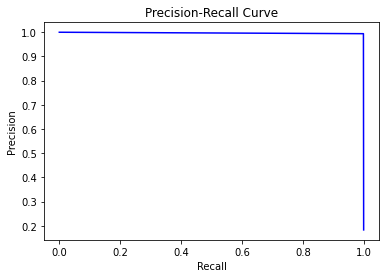

In [3]:
#Plot Precision-Recall Curve 
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')
ax.grid(False)

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
#plt.savefig('Precision-Recall_curve_DNN_UGR_after.png')
plt.show()

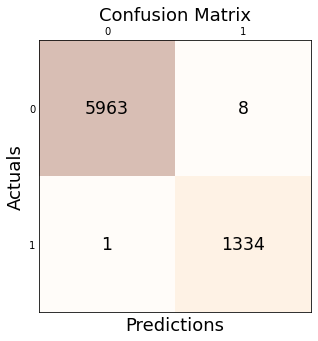

In [4]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap='Oranges', alpha=0.3)
ax.grid(False)
plt.tick_params(axis=u'both', which=u'both',length=0)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.savefig('confusion_matrix_DNN_UGR_dos_after.png')
plt.show()

roc_auc_score:  0.9989555636261908


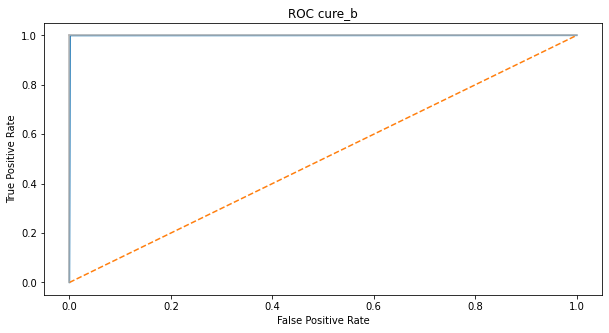

In [5]:
# Plot ROC
from sklearn.metrics import auc, plot_precision_recall_curve, roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
plt.subplots(1, figsize=(10,5))
plt.title('ROC cure_b')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Roc_curve_DNN_UGR_dos_after.png')
plt.show()